# Current Sheet Test


In [31]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

import Boris as boris

#para leer los archivos necesitas instalar el paquete h5py, que lee archivos en formato hdf5 que es el formato de archivos que escribe el codigo de la simulacion.

name='C:/Users/lueiz/Desktop/Intro a la Investigación 2/flds.tot.00085'

f=h5py.File(name,'r') #llamamos al archivo en modo de lectura 'r'
bx=f.get('bx') #obtenemos el campo magnetico en x
bx=np.array(bx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bx=np.transpose(bx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

by=f.get('by') #obtenemos el campo magnetico en x
by=np.array(by)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
by=np.transpose(by) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

bz=f.get('bz') #obtenemos el campo magnetico en x
bz=np.array(bz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bz=np.transpose(bz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ex=f.get('ex') #obtenemos el campo magnetico en x
ex=np.array(ex)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ex=np.transpose(ex) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ey=f.get('ey') #obtenemos el campo magnetico en x
ey=np.array(ey)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ey=np.transpose(ey) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ez=f.get('ez') #obtenemos el campo magnetico en x
ez=np.array(ez)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ez=np.transpose(ez) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

#para las demas componentes del campo magnetico tienes que usar get('by') o 'bz', si quieres el campo electrico están en 'ex', 'ey' y 'ez'

b=np.array((bx,by,bz))

e=np.array((ex,ey,ez))

Nx=np.size(b[0,:,0])

Ny=np.size(b[0,0,:])

# drift_vel= np.loadtxt('C:/Users/lueiz/Desktop/Intro a la Investigación 2/Introduccion-a-la-Investigacion-II/velocity_drift_00085.txt').reshape(b.shape)

#gamma1= np.loadtxt('/content/gamma1.txt')



In [32]:

theta=np.linspace(0,2*np.pi,30)

print(theta)

v_i=np.zeros((3,3*len(theta)))

for i in range(0,len(theta)):
    v_i[0,i]=0.1*np.cos(theta[i])
    v_i[1,i]=0.1*np.sin(theta[i])


for i in range(len(theta),2*len(theta)):
    v_i[0,i]=0.1*np.cos(theta[int(i/2)])
    v_i[1,i]=0.1*np.sin(theta[int(i/2)])


for i in range(2*len(theta),3*len(theta)):
    v_i[0,i]=0.1*np.cos(theta[int(i/3)])
    v_i[1,i]=0.1*np.sin(theta[int(i/3)])

# Factor de Lorentz

print(np.shape(v_i))

gamma0=np.zeros(len(v_i[0,:]))

for i in range(0,len(np.transpose(v_i))):
    gamma0[i]=1/np.sqrt((1-np.linalg.norm(np.transpose(v_i[:,i]))**2))
print(gamma0)


# Pasos temporales

c=0.45

istep=8

factor=10

dx=1
dt=1*c/istep

NT=30

x=np.arange(0,Nx,int(dx))
y=np.arange(0,Ny,int(dx))

r0 = np.zeros((3,3*len(theta)))

for i in range(0,len(theta)):
    r0[0,i]=2725
    r0[1,i]=425


for i in range(len(theta),2*len(theta)):
    r0[0,i]=2725
    r0[1,i]=425+10


for i in range(2*len(theta),3*len(theta)):
    r0[0,i]=2725
    r0[1,i]=425-10


[0.         0.21666156 0.43332312 0.64998469 0.86664625 1.08330781
 1.29996937 1.51663094 1.7332925  1.94995406 2.16661562 2.38327719
 2.59993875 2.81660031 3.03326187 3.24992343 3.466585   3.68324656
 3.89990812 4.11656968 4.33323125 4.54989281 4.76655437 4.98321593
 5.1998775  5.41653906 5.63320062 5.84986218 6.06652374 6.28318531]
(3, 90)
[2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734 2.29415734
 2.29415734 2.29415734 2.29415734 2.29415734 2.294157

In [33]:
r_plot,v,gamma=boris.varias_particulas(x,y,v_i,gamma0,r0,ex,ey,ez,bx,by,bz,NT,Nx,Ny,dt)

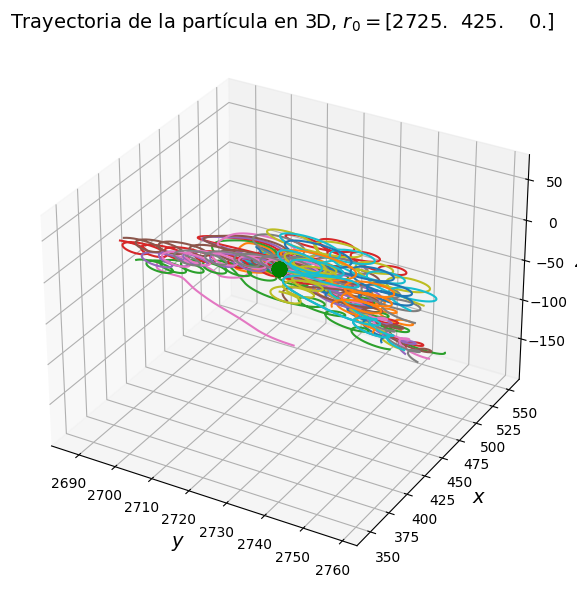

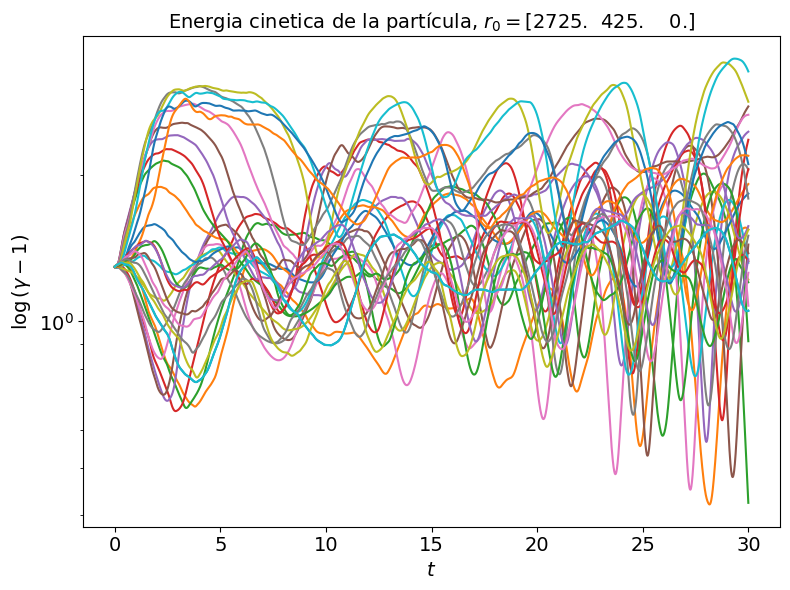

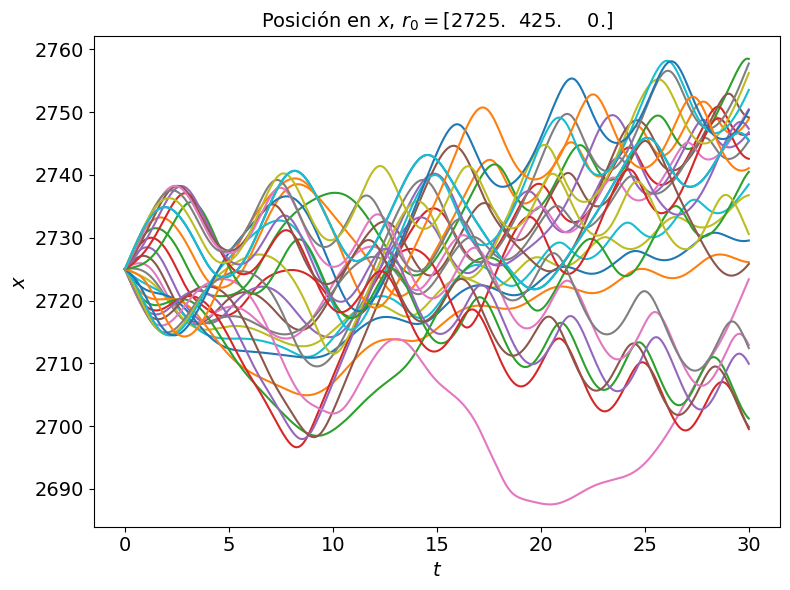

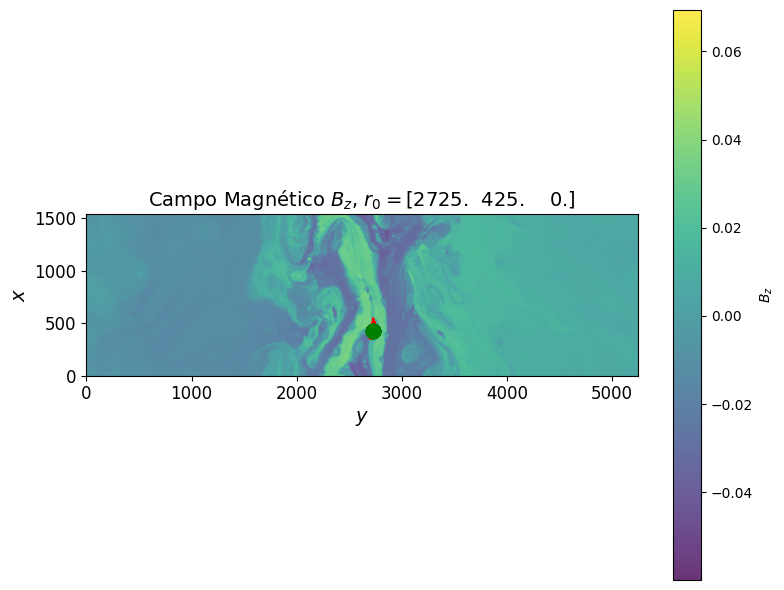

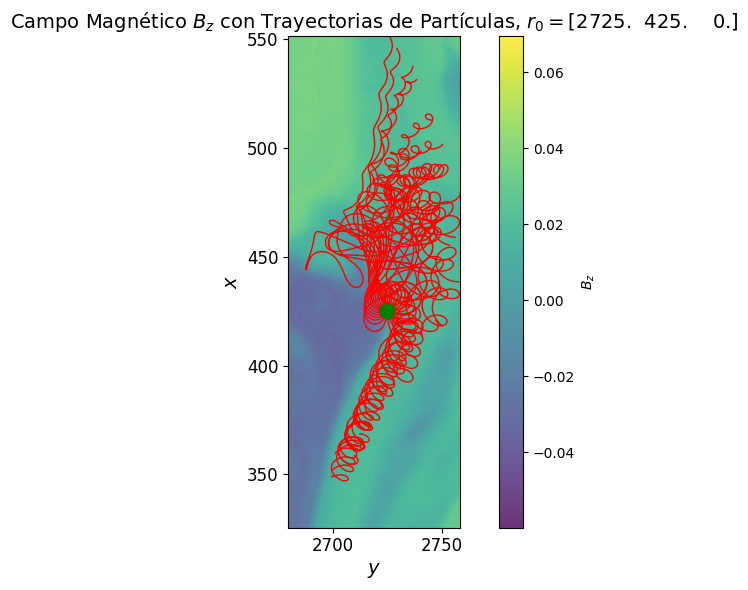

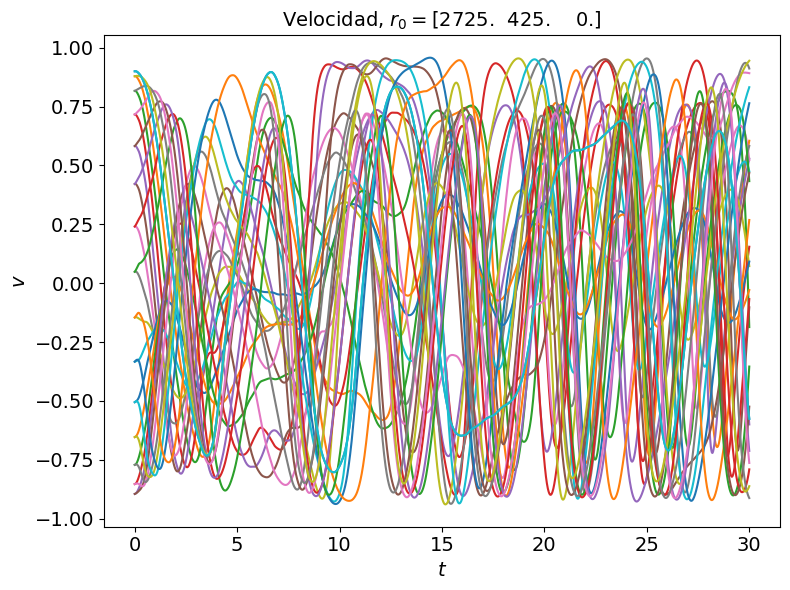

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

t=np.linspace(0,NT,int(NT*155*1)) # Defino mi Delta t como se obtuvo en en analisis

t1=np.linspace(0,NT,int(NT*155*factor)) # Defino mi Delta t como se obtuvo en en analisis

Np=int(np.size(r0)/3)

# Gráfico 3D de la trayectoria de la partícula
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')

for i in range(0,int(Np/3)):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], r_plot[:, 2, i])

    # Marcar el punto inicial
    ax.scatter(r_plot[0, 0, i], r_plot[0, 1, i], r_plot[0, 2, i], color='g', s=100)

ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
# plt.legend()
plt.title(r'Trayectoria de la partícula en 3D, $r_0=$'+str(r0[:,0]) , fontsize=14)
plt.tight_layout()
plt.show()

# Gráfico 1D de gamma en función del tiempo
#t1=np.linspace(0,NT,len(gamma1))
fig2 = plt.figure(figsize=(8, 6))
for i in range(0,int(Np/3)):
    plt.semilogy(t, gamma[:,i] - 1)


plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{(\gamma-1)}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energia cinetica de la partícula, $r_0=$'+str(r0[:,0]), fontsize=14)
plt.tight_layout()
# plt.legend()

plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig3 = plt.figure(figsize=(8, 6))
for i in range(0,int(Np/3)):
    plt.plot(t, r_plot[:, 0, i])
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Posición en $x$, $r_0=$'+str(r0[:,0]), fontsize=14)
plt.tight_layout()
# plt.legend()
plt.show()
# Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz

fig4 = plt.figure(figsize=(8, 6))
for i in range(0,int(Np/3)):
    plt.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1,)

    plt.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

plt.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.colorbar(label='$B_z$', orientation='vertical')
plt.xlabel('$y$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Campo Magnético $B_z$, $r_0=$'+str(r0[:,0]), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()
plt.tight_layout()

plt.show()


# Crear la figura y el conjunto de ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar el campo magnético con imshow y guardar la referencia al objeto mapeable
mappable = ax.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)

# Crear la barra de color utilizando el objeto mapeable
plt.colorbar(mappable, label='$B_z$', orientation='vertical')

# Dibujar las trayectorias de las partículas
for i in range(0, int(Np/3)):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1)
    ax.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

# Etiquetas y título
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_title('Campo Magnético $B_z$ con Trayectorias de Partículas, $r_0=$'+str(r0[:,0]), fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Ajusta los límites de los ejes para concentrarte en las líneas rojas
ax.set_xlim([r_plot[:, 0, :].min(), r_plot[:, 0, :].max()])
ax.set_ylim([r_plot[:, 1, :].min(), r_plot[:, 1, :].max()])

# Ajuste de layout
plt.tight_layout()
plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig6 = plt.figure(figsize=(8, 6))
for i in range(0,int(Np/3)):
    plt.plot(t, v[:, 0, i])
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$v$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Velocidad, $r_0=$'+str(r0[:,0]), fontsize=14)
plt.tight_layout()
# plt.legend()

# Mostrar los gráficos
plt.show()


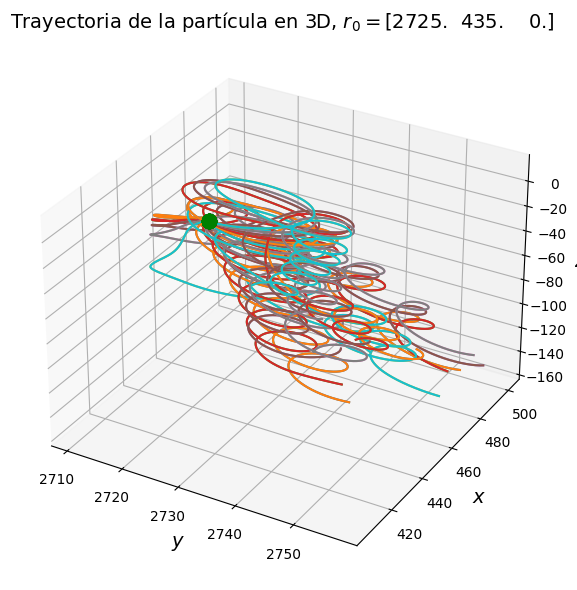

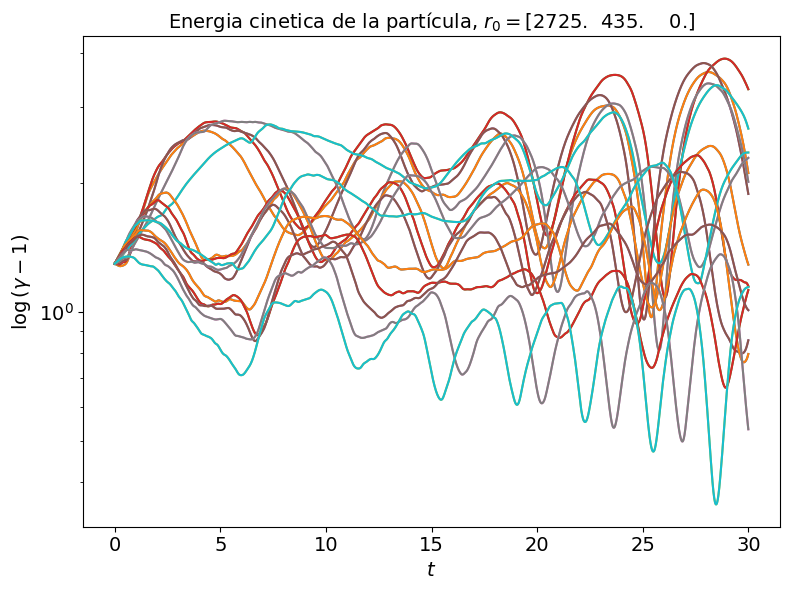

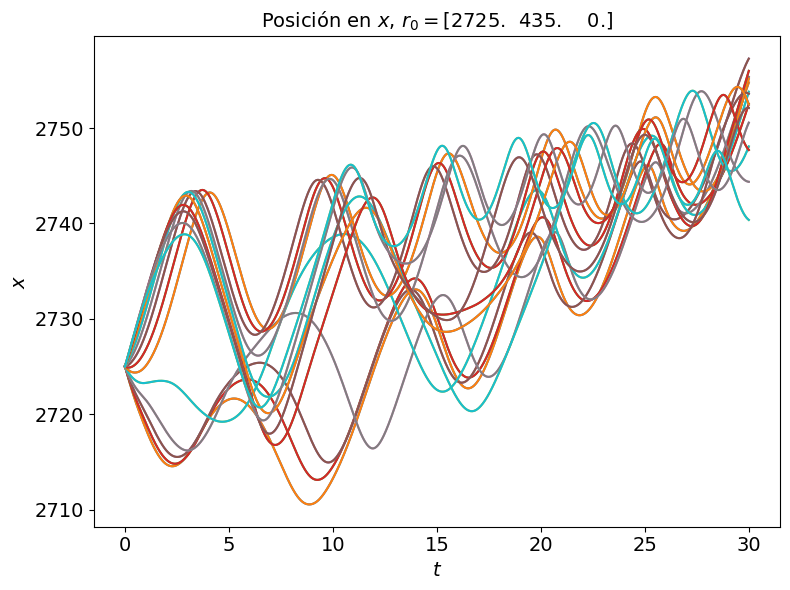

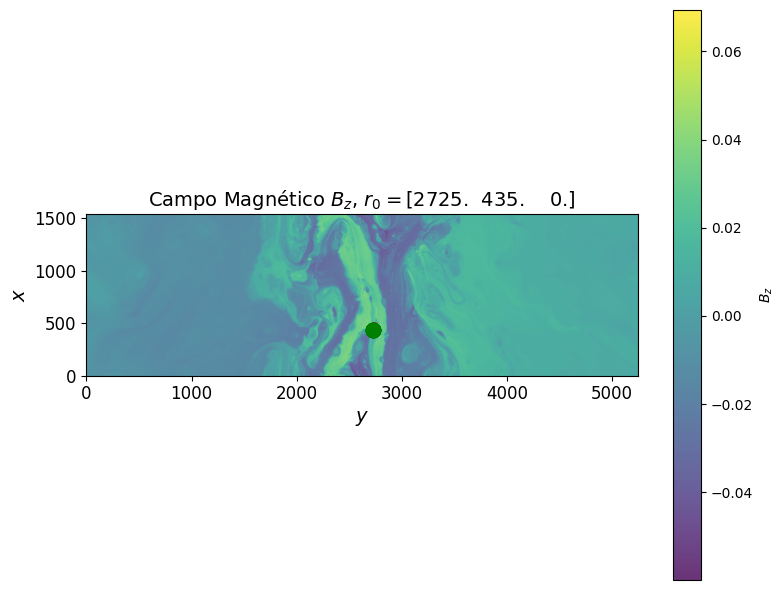

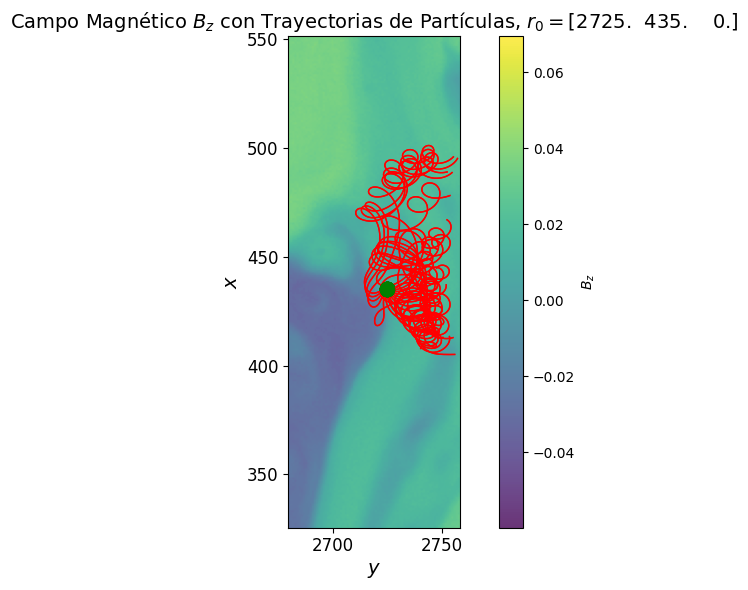

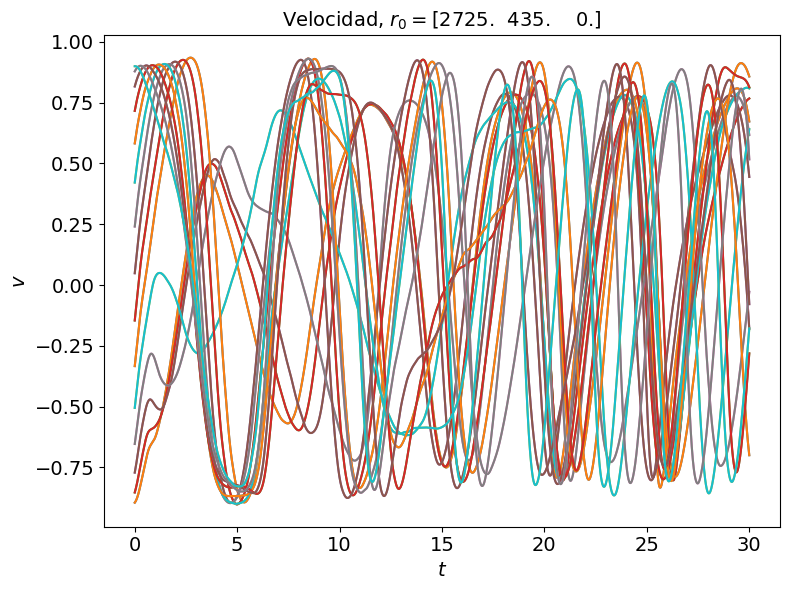

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

t=np.linspace(0,NT,int(NT*155*1)) # Defino mi Delta t como se obtuvo en en analisis

t1=np.linspace(0,NT,int(NT*155*factor)) # Defino mi Delta t como se obtuvo en en analisis

Np=int(np.size(r0)/3)

# Gráfico 3D de la trayectoria de la partícula
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')

for i in range(int(Np/3),int(2*Np/3)):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], r_plot[:, 2, i])

    # Marcar el punto inicial
    ax.scatter(r_plot[0, 0, i], r_plot[0, 1, i], r_plot[0, 2, i], color='g', s=100)

ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
# plt.legend()
plt.title(r'Trayectoria de la partícula en 3D, $r_0=$'+str(r0[:,30]) , fontsize=14)
plt.tight_layout()
plt.show()

# Gráfico 1D de gamma en función del tiempo
#t1=np.linspace(0,NT,len(gamma1))
fig2 = plt.figure(figsize=(8, 6))
for i in range(int(Np/3),int(2*Np/3)):
    plt.semilogy(t, gamma[:,i] - 1)


plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{(\gamma-1)}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energia cinetica de la partícula, $r_0=$'+str(r0[:,30]), fontsize=14)
plt.tight_layout()
# plt.legend()

plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig3 = plt.figure(figsize=(8, 6))
for i in range(int(Np/3),int(2*Np/3)):
    plt.plot(t, r_plot[:, 0, i])
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Posición en $x$, $r_0=$'+str(r0[:,30]), fontsize=14)
plt.tight_layout()
# plt.legend()
plt.show()
# Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz

fig4 = plt.figure(figsize=(8, 6))
for i in range(int(Np/3),int(2*Np/3)):
    plt.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1,)

    plt.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

plt.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.colorbar(label='$B_z$', orientation='vertical')
plt.xlabel('$y$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Campo Magnético $B_z$, $r_0=$'+str(r0[:,30]), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()
plt.tight_layout()

plt.show()


# Crear la figura y el conjunto de ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar el campo magnético con imshow y guardar la referencia al objeto mapeable
mappable = ax.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)

# Crear la barra de color utilizando el objeto mapeable
plt.colorbar(mappable, label='$B_z$', orientation='vertical')

# Dibujar las trayectorias de las partículas
for i in range(int(Np/3),int(2*Np/3)):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1)
    ax.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

# Etiquetas y título
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_title('Campo Magnético $B_z$ con Trayectorias de Partículas, $r_0=$'+str(r0[:,30]), fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Ajusta los límites de los ejes para concentrarte en las líneas rojas
ax.set_xlim([r_plot[:, 0, :].min(), r_plot[:, 0, :].max()])
ax.set_ylim([r_plot[:, 1, :].min(), r_plot[:, 1, :].max()])

# Ajuste de layout
plt.tight_layout()
plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig6 = plt.figure(figsize=(8, 6))
for i in range(int(Np/3),int(2*Np/3)):
    plt.plot(t, v[:, 0, i])
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$v$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Velocidad, $r_0=$'+str(r0[:,30]), fontsize=14)
plt.tight_layout()
# plt.legend()

# Mostrar los gráficos
plt.show()


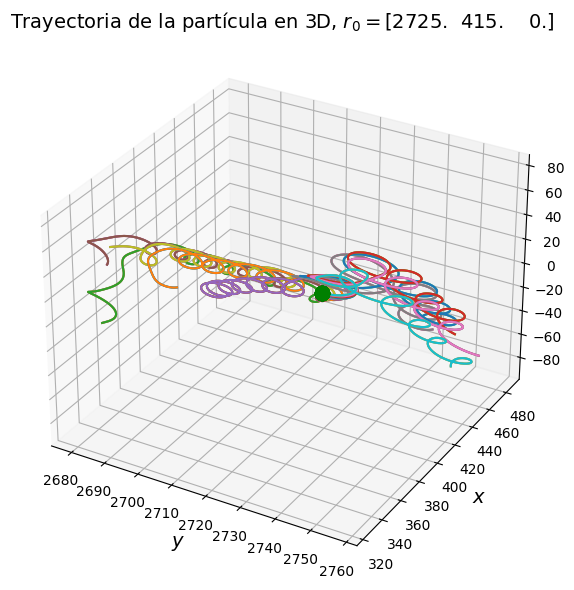

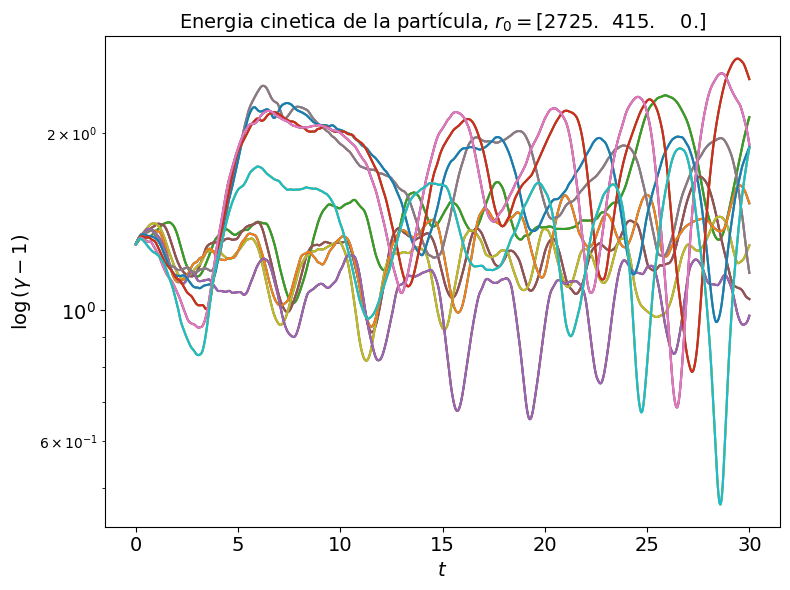

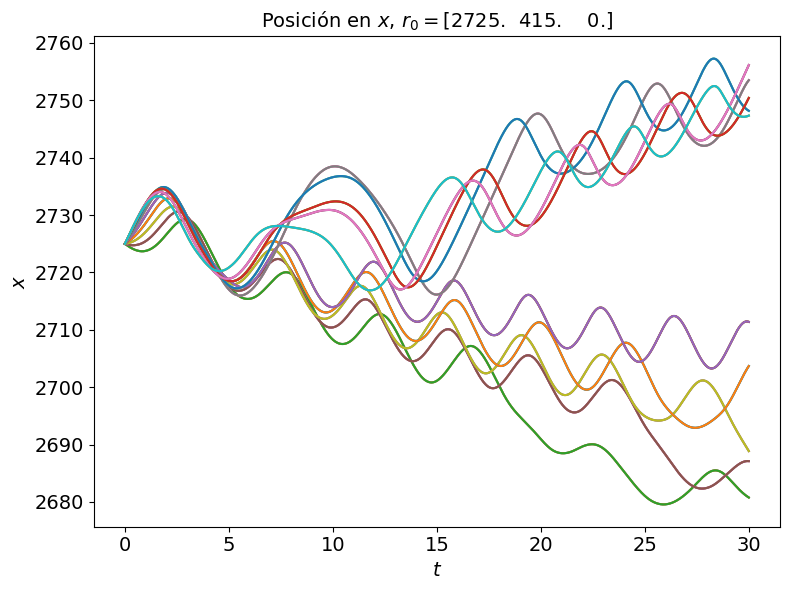

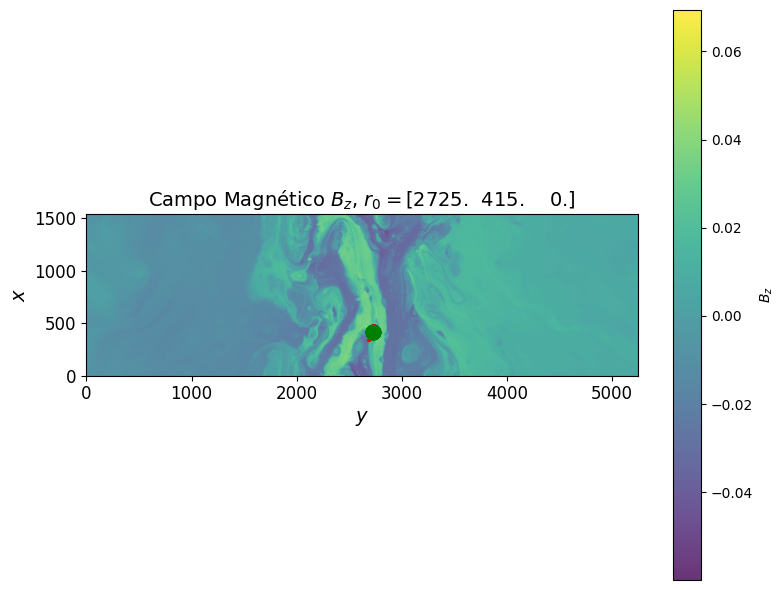

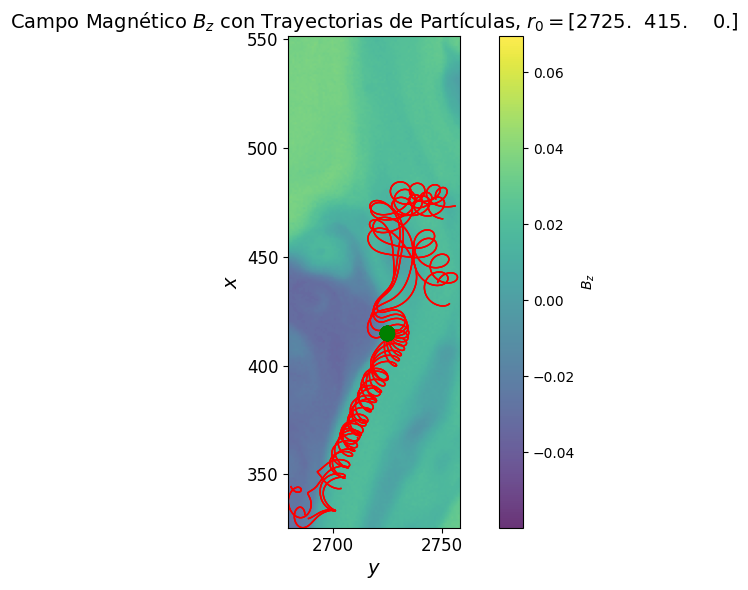

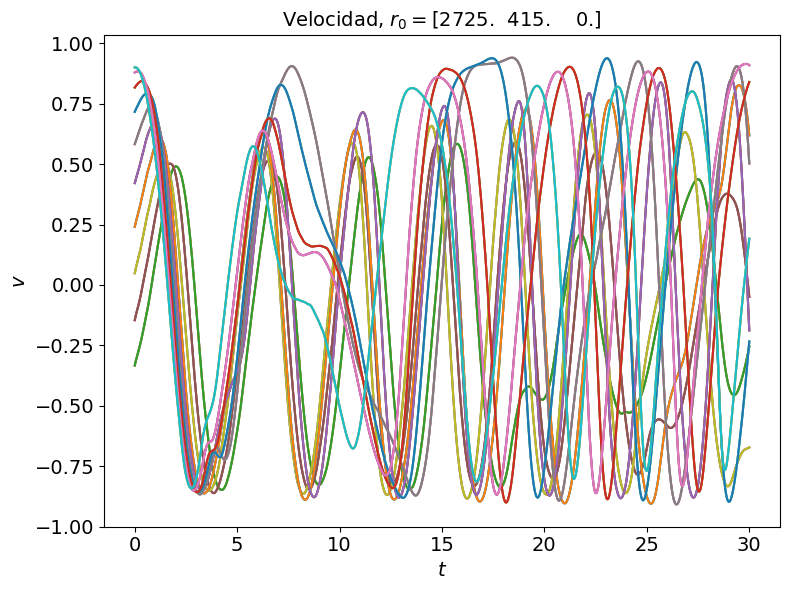

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

t=np.linspace(0,NT,int(NT*155*1)) # Defino mi Delta t como se obtuvo en en analisis

t1=np.linspace(0,NT,int(NT*155*factor)) # Defino mi Delta t como se obtuvo en en analisis

Np=int(np.size(r0)/3)

# Gráfico 3D de la trayectoria de la partícula
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')

for i in range(int(2*Np/3),int(3*Np/3)):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], r_plot[:, 2, i])

    # Marcar el punto inicial
    ax.scatter(r_plot[0, 0, i], r_plot[0, 1, i], r_plot[0, 2, i], color='g', s=100)

ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
# plt.legend()
plt.title(r'Trayectoria de la partícula en 3D, $r_0=$'+str(r0[:,60]) , fontsize=14)
plt.tight_layout()
plt.show()

# Gráfico 1D de gamma en función del tiempo
#t1=np.linspace(0,NT,len(gamma1))
fig2 = plt.figure(figsize=(8, 6))
for i in range(int(2*Np/3),int(3*Np/3)):
    plt.semilogy(t, gamma[:,i] - 1)


plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{(\gamma-1)}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energia cinetica de la partícula, $r_0=$'+str(r0[:,60]), fontsize=14)
plt.tight_layout()
# plt.legend()

plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig3 = plt.figure(figsize=(8, 6))
for i in range(int(2*Np/3),int(3*Np/3)):
    plt.plot(t, r_plot[:, 0, i])
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Posición en $x$, $r_0=$'+str(r0[:,60]), fontsize=14)
plt.tight_layout()
# plt.legend()
plt.show()
# Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz

fig4 = plt.figure(figsize=(8, 6))
for i in range(int(2*Np/3),int(3*Np/3)):
    plt.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1,)

    plt.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

plt.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.colorbar(label='$B_z$', orientation='vertical')
plt.xlabel('$y$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Campo Magnético $B_z$, $r_0=$'+str(r0[:,60]), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()
plt.tight_layout()

plt.show()


# Crear la figura y el conjunto de ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar el campo magnético con imshow y guardar la referencia al objeto mapeable
mappable = ax.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)

# Crear la barra de color utilizando el objeto mapeable
plt.colorbar(mappable, label='$B_z$', orientation='vertical')

# Dibujar las trayectorias de las partículas
for i in range(int(2*Np/3),int(3*Np/3)):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1)
    ax.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

# Etiquetas y título
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_title('Campo Magnético $B_z$ con Trayectorias de Partículas, $r_0=$'+str(r0[:,60]), fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Ajusta los límites de los ejes para concentrarte en las líneas rojas
ax.set_xlim([r_plot[:, 0, :].min(), r_plot[:, 0, :].max()])
ax.set_ylim([r_plot[:, 1, :].min(), r_plot[:, 1, :].max()])

# Ajuste de layout
plt.tight_layout()
plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig6 = plt.figure(figsize=(8, 6))
for i in range(int(2*Np/3),int(3*Np/3)):
    plt.plot(t, v[:, 0, i])
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$v$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Velocidad, $r_0=$'+str(r0[:,60]), fontsize=14)
plt.tight_layout()
# plt.legend()

# Mostrar los gráficos
plt.show()


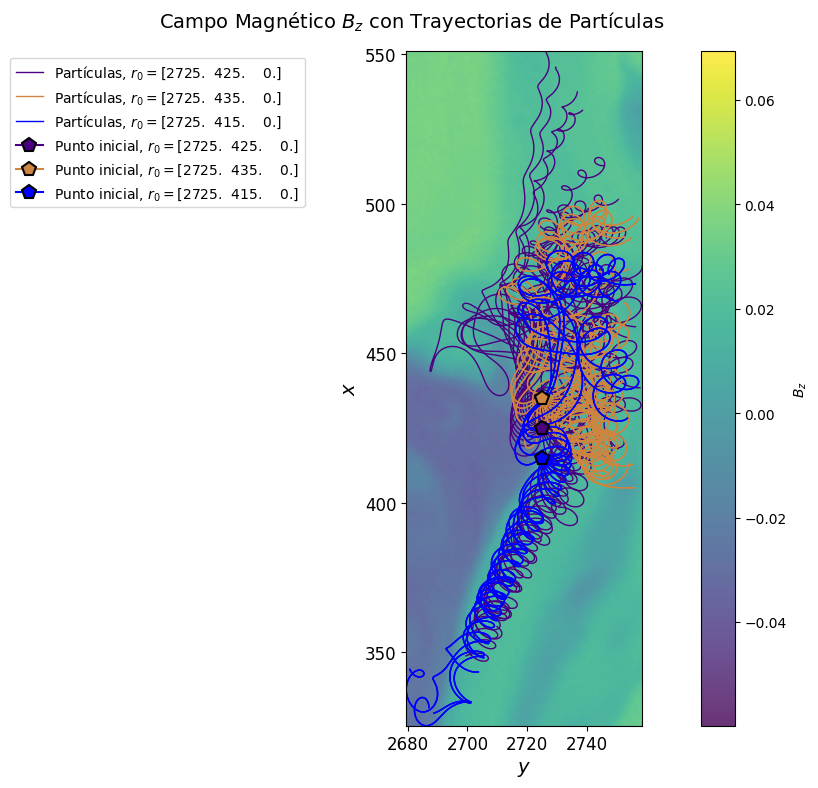

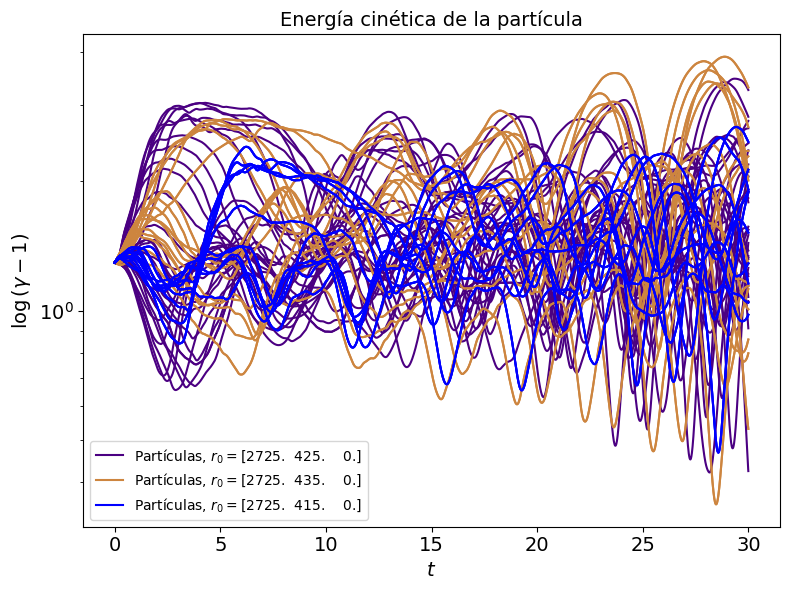

In [121]:
fig, ax = plt.subplots(figsize=(12, 8))

# Mostrar el campo magnético con imshow y guardar la referencia al objeto mapeable
mappable = ax.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)

# Crear la barra de color utilizando el objeto mapeable
plt.colorbar(mappable, label='$B_z$', orientation='vertical')

# Dibujar las trayectorias de las partículas
for i in range(0, Np):
    if i < 30:
        if i == 0:  # Añadir solo una vez el label para este color
            ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], color='indigo', linewidth=1, label='Partículas, $r_0=$' + str(r0[:, 0]))
        else:
            ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], color='indigo', linewidth=1)
    elif i >= 30 and i < 60:
        if i == 30:  # Añadir solo una vez el label para este color
            ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], color='peru', linewidth=1, label='Partículas, $r_0=$' + str(r0[:, 30]))
        else:
            ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], color='peru', linewidth=1)
    else:
        if i == 60:  # Añadir solo una vez el label para este color
            ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], color='blue', linewidth=1, label='Partículas, $r_0=$' + str(r0[:, 60]))
        else:
            ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], color='blue', linewidth=1)

# Dibujar puntos grandes con forma de pentágono y contorno
ax.plot(r_plot[0, 0, 0], r_plot[0, 1, 0], marker='p', color='indigo', markeredgecolor='black', markeredgewidth=1.5, markersize=10,label='Punto inicial, $r_0=$' + str(r0[:, 0]))
ax.plot(r_plot[0, 0, 30], r_plot[0, 1, 30], marker='p', color='peru', markeredgecolor='black', markeredgewidth=1.5, markersize=10,label='Punto inicial, $r_0=$' + str(r0[:, 30]))
ax.plot(r_plot[0, 0, 60], r_plot[0, 1, 60], marker='p', color='blue', markeredgecolor='black', markeredgewidth=1.5, markersize=10,label='Punto inicial, $r_0=$' + str(r0[:, 60]))

# Etiquetas y título
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
fig.suptitle('Campo Magnético $B_z$ con Trayectorias de Partículas', fontsize=14,x=0.6)  
ax.tick_params(axis='both', which='major', labelsize=12)

# Ajusta los límites de los ejes para concentrarte en las líneas rojas
ax.set_xlim([r_plot[:, 0, :].min(), r_plot[:, 0, :].max()])
ax.set_ylim([r_plot[:, 1, :].min(), r_plot[:, 1, :].max()])

# Mostrar la leyenda
ax.legend(bbox_to_anchor=(-0.4,1))

# Ajuste de layout
plt.tight_layout()
plt.show()

# Ahora con la energía
fig2 = plt.figure(figsize=(8, 6))
for i in range(0, Np):
    if i < 30:
        if i == 0:  # Añadir solo una vez el label para este color
            plt.semilogy(t, gamma[:, i] - 1, color='indigo', label='Partículas, $r_0=$' + str(r0[:, 0]))
        else:
            plt.semilogy(t, gamma[:, i] - 1, color='indigo')
    elif i >= 30 and i < 60:
        if i == 30:  # Añadir solo una vez el label para este color
            plt.semilogy(t, gamma[:, i] - 1, color='peru', label='Partículas, $r_0=$' + str(r0[:, 30]))
        else:
            plt.semilogy(t, gamma[:, i] - 1, color='peru')
    else:
        if i == 60:  # Añadir solo una vez el label para este color
            plt.semilogy(t, gamma[:, i] - 1, color='blue', label='Partículas, $r_0=$' + str(r0[:, 60]))
        else:
            plt.semilogy(t, gamma[:, i] - 1, color='blue')

# Etiquetas y título
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{(\gamma-1)}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energía cinética de la partícula', fontsize=14)

# Mostrar la leyenda
plt.legend()

plt.tight_layout()
plt.show()
